In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
df = pd.read_csv('games.csv')

In [ ]:
import pandas as pd
import ast
expanded_rows = []
for index, row in df.iterrows():
    for genre in ast.literal_eval(row['Genres']):
        expanded_rows.append({'Id': row['Id'],
                              'title': row['Title'],
                              'Release Date': row['Release Date'],
                              'Team': row['Team'],
                              'Rating': row['Rating'],
                              'Times Listed': row['Times Listed'],
                              'Number of Reviews': row['Number of Reviews'],
                              'Genres': genre,
                              'Plays': row['Plays'],
                              'Playing': row['Playing'],
                              'Backlogs': row['Backlogs'],
                              'Wishlist':row['Wishlist']})
df_new = pd.DataFrame(expanded_rows)
df_new.to_csv('genre_expanded_data_new.csv')

In [ ]:
import pandas as pd
import ast
expanded_rows = []
df_cleaned = df_new.dropna()
for index, row in df_cleaned.iterrows():
    for Team in ast.literal_eval(row['Team']):
        expanded_rows.append({'Id': row['Id'],
                              'title': row['title'],
                              'Release Date': row['Release Date'],
                              'Team': Team,
                              'Rating': row['Rating'],
                              'Times Listed': row['Times Listed'],
                              'Number of Reviews': row['Number of Reviews'],
                              'Genres': row['Genres'],
                              'Plays': row['Plays'],
                              'Playing': row['Playing'],
                              'Backlogs': row['Backlogs'],
                              'Wishlist':row['Wishlist']})
df_hello = pd.DataFrame(expanded_rows)
df_hello.to_csv('team_expanded_data_new.csv')

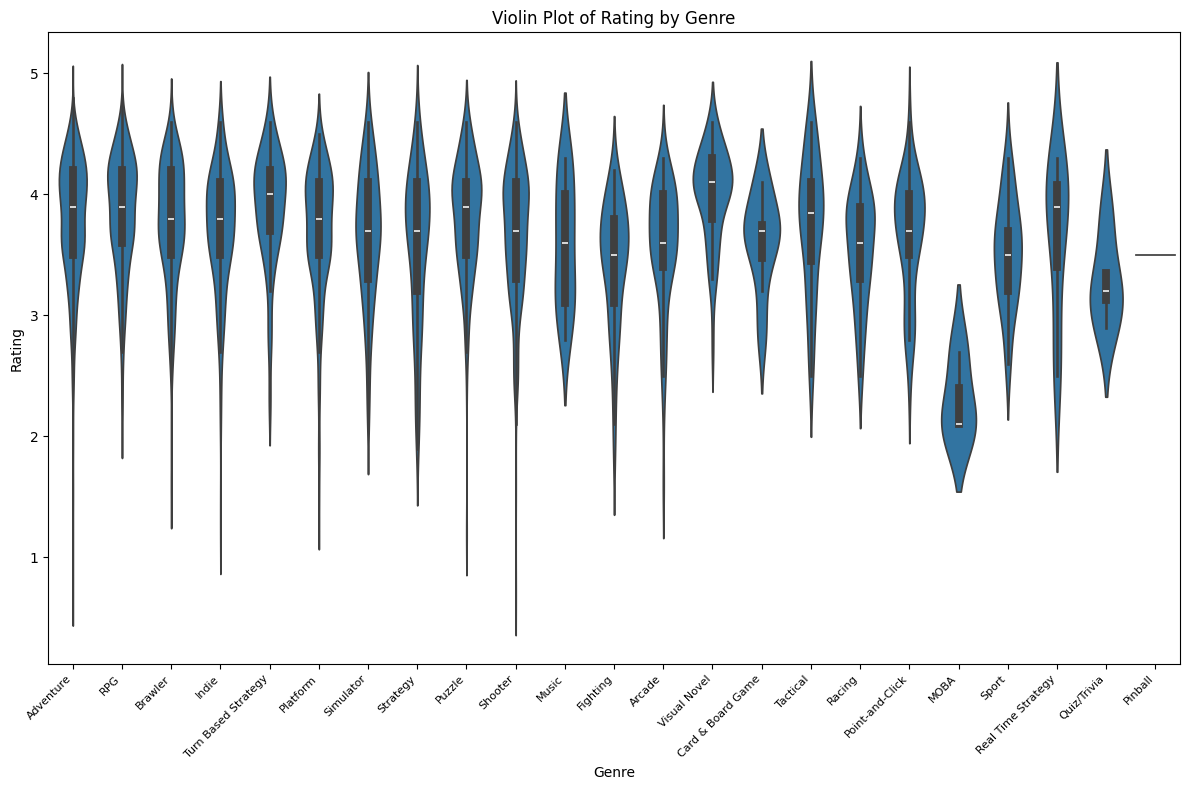

In [ ]:
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming your dataset is stored in a DataFrame named 'df'

    # Create the violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Genres', y='Rating', data=df_new)
    plt.title('Violin Plot of Rating by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


<ipython-input-30-b70cf89ce809>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


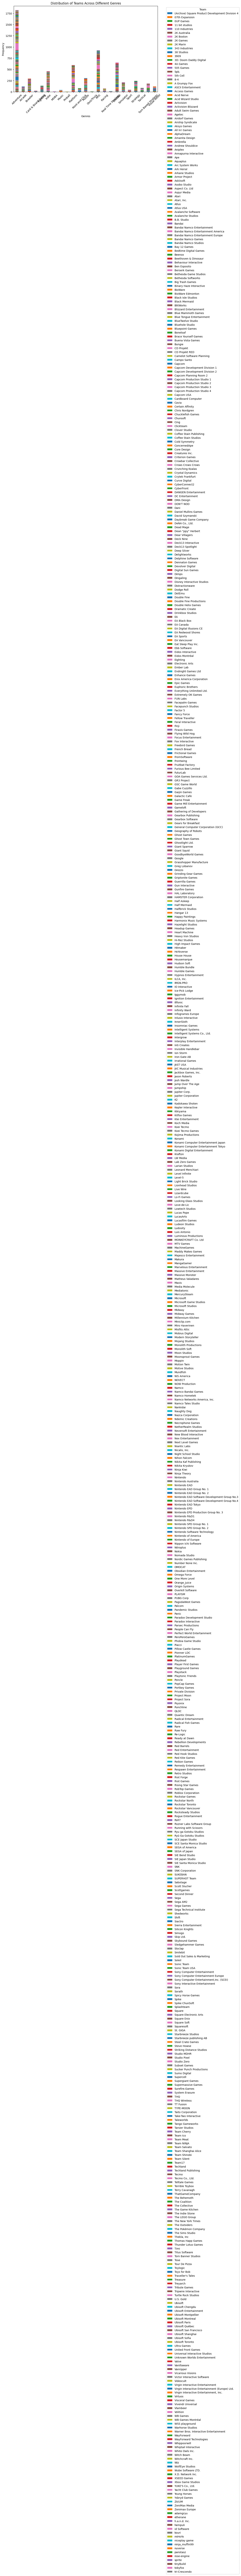

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Group the data by the 'Genres' column and count the occurrences of each team within each genre
team_counts_by_genre = df_hello.groupby('Genres')['Team'].value_counts().unstack(fill_value=0)

# Plot the stacked bar graph
team_counts_by_genre.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Distribution of Teams Across Different Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
